In [1]:
import Bio
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
random.seed()

In [2]:
genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
genarr = list(genes.values())
lam = 0.25
alph = 250
ki = 200
ka = 400
hi = 2
ha = 20

In [3]:
def compDs():
    #print(genes)
    dgAdt = (alph * (1/(1+np.power((genes["B"]/ki),hi)))) - lam*genes["A"]
    dgBdt = (alph * (1/(1+np.power((genes["A"]/ki),hi)))) - lam*genes["B"]
    dgCdt = (alph * (1/(1+np.power((ka/genes["A"]),ha))) * (1/(1+np.power((genes["D"]/ki),hi)))) - lam*genes["C"]
    dgDdt = (alph * (1/(1+np.power((ka/genes["A"]),ha))) * (1/(1+np.power((genes["C"]/ki),hi)))) - lam*genes["D"]
    dgEdt = (alph * (1/(1+np.power((ka/genes["B"]),ha))) * (1/(1+np.power((genes["F"]/ki),hi)))) - lam*genes["E"]
    dgFdt = (alph * (1/(1+np.power((ka/genes["B"]),ha))) * (1/(1+np.power((genes["E"]/ki),hi)))) - lam*genes["F"]
    return [dgAdt,dgBdt,dgCdt,dgDdt,dgEdt,dgFdt]

In [4]:
for i in compDs():
    print(i)
diffs = compDs()

1.923076923076934
1.923076923076934
0.7902967861300224
0.7902967861300224
0.7902967861300224
0.7902967861300224


In [5]:
deltt = 1
sigma = 10
tmax = 100
tmin = 0
y = 0
print(y)

0


In [6]:
def fixGenes(genes, genarr):
    #print(genes)
    genes["A"] = genarr[0]
    genes["B"] = genarr[1]
    genes["C"] = genarr[2]
    genes["D"] = genarr[3]
    genes["E"] = genarr[4]
    genes["F"] = genarr[5]
    return genes

In [7]:
sixdim = []
for rep in range(400):
    stop = random.randint(10,tmax-1)
    genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
    genarr = list(genes.values())
    for t in range(tmin,stop):
        for g in range(len(genes)):
            y = genarr[g] + (diffs[g]*deltt) + (sigma*np.sqrt(deltt)*random.gauss(0,1))
            genarr[g] = y
        #print(genes)
        genes = fixGenes(genes,genarr)
        diffs = compDs()
    #print(genes)
    genarr = list(genes.values())
    sixdim.append(genarr)

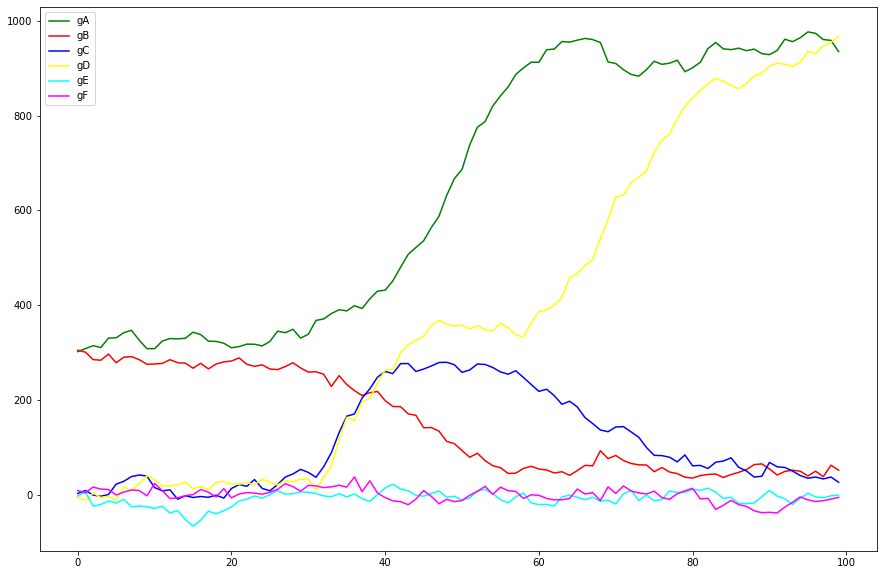

In [8]:
singrun = []
genes = {"A":300,"B":300,"C":0,"D":0,"E":0,"F":0}
genarr = list(genes.values())
#print(diffs)
for t in range(tmin,100):
    diffs = compDs()
    for g in range(len(genes)):
        y = genarr[g] + (diffs[g]*deltt) + (sigma*np.sqrt(deltt)*random.gauss(0,1))
        genarr[g] = y
    #print(genes)
    genes = fixGenes(genes,genarr)
    singrun.append(genarr[:])
    #print(singrun)
singrun = np.array(singrun)
#print(singrun)
fig = plt.figure(figsize=(15,10))
plt.plot(singrun[:,0], color='green', label="gA")
plt.plot(singrun[:,1], color='red', label="gB")
plt.plot(singrun[:,2], color='blue', label="gC")
plt.plot(singrun[:,3], color='yellow', label="gD")
plt.plot(singrun[:,4], color='cyan', label="gE")
plt.plot(singrun[:,5], color='magenta', label="gF")
plt.legend()
plt.show()

In [9]:
sixdim = np.round(np.array(sixdim),2)
print(sixdim.shape)

(400, 6)


*sig* here was found through empirical testing to get the most clear image possible, so will need tweaking and adjusting to get the best possible/most coherent image for any given specific run

In [10]:
sim_mtx = np.zeros((400,400))
sig = 14
for x in range(400):
    for y in range(400):
        if x==y:
            sim_mtx[x][y] = 1
        else:
            dist = np.sqrt(np.sum(np.power(np.subtract(sixdim[x],sixdim[y]),2)))
            calc = np.exp(-0.5*np.power((dist/(sig*sig)),2))
            #print(calc)
            sim_mtx[x][y] = calc

In [11]:
La = np.zeros((400,400))
for x in range(400):
    tot = np.sum(sim_mtx[x])
    La[x] = np.divide(sim_mtx[x],tot)
#print(La.sum(axis=1))
#print(sim_mtx.sum(axis=1))

In [12]:
eigVals, eigVecs = np.linalg.eigh(La)
ind = np.argpartition(eigVals, -3)[-3:]
#print(eigVals)

#print(np.dot(La,eigVecs[:,0]))
#print(eigVecs[:,0])

#print(eigVecs[:,0])
#print(eigVecs[:,ind])
eigMtx = eigVecs[:,ind]
realMtx = np.real(eigMtx)

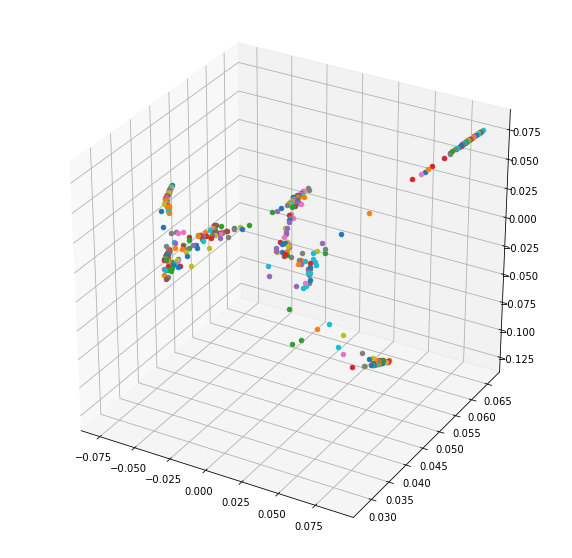

In [13]:
colors = ["red","blue","yellow","green","magenta","cyan"]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
z_points = realMtx[:,0]
x_points = realMtx[:,1]
y_points = realMtx[:,2]
for i in range(len(z_points)):
    #coolr = "red"
    ax.scatter3D(x_points[i], y_points[i], z_points[i]);
plt.show()

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(6).fit_predict(realMtx)
#print(kmeans)
clusters = [[],[],[],[],[],[]]
for k in range(len(kmeans)):
    clusters[kmeans[k]].append(sixdim[k])

for e in range(len(clusters)):
    print("Cluster "+str(e))
    clusters[e] = np.mean(clusters[e],axis=0)
    print(clusters[e])

Cluster 0
[ 43.15456522 946.14065217   1.27717391  -1.70152174  56.51021739
 891.90434783]
Cluster 1
[7.80181858e+02 8.91953097e+01 2.24298673e+02 5.09010177e+02
 8.72831858e-01 6.07168142e-01]
Cluster 2
[ 42.75413793 942.75103448   3.22155172  -1.90275862 890.35706897
  53.31293103]
Cluster 3
[277.93670455 339.495       13.50306818  12.47        72.00943182
  77.24954545]
Cluster 4
[ 83.31767442 786.96069767  -1.05465116  -6.32069767 313.43767442
 324.30627907]
Cluster 5
[9.50157308e+02 4.23519231e+01 8.95340769e+02 5.46759615e+01
 8.70192308e-01 2.59461538e+00]


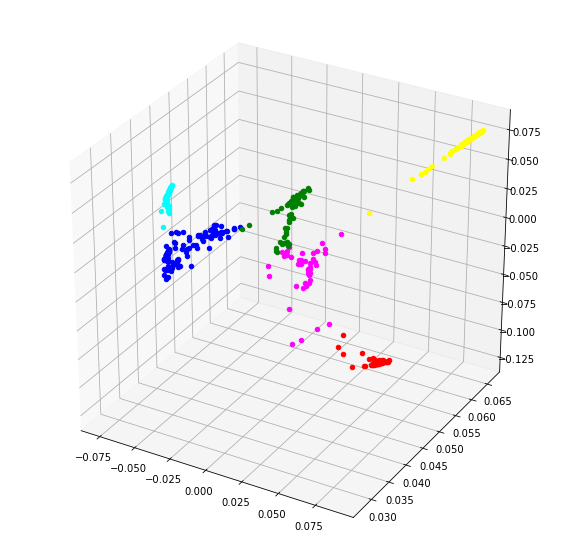

In [15]:
colors = ["red","blue","yellow","green","magenta","cyan"]
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
z_points = realMtx[:,0]
x_points = realMtx[:,1]
y_points = realMtx[:,2]
for i in range(len(z_points)):
    coolr = colors[kmeans[i]]
    ax.scatter3D(x_points[i], y_points[i], z_points[i], c=coolr);
plt.show()